# Przygotowanie

Przygotowanie Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# KNN

Podobnie jak w przypadku maszyny wektorów nosnych (SVC) oraz drzew decyzyjnych, KNN może słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. Algorytm KNN jest przykładem leniwego uczenia (lazy learning), co oznacza, że nie tworzy on modelu na podstawie danych uczących. Zamiast tego, w momencie klasyfikacji nowej obserwacji, algorytm poszukuje k najbardziej podobnych przypadków w zbiorze danych treningowych i przypisuje mu etykietę tej klasy, do której należy większość jego k sąsiadów.

**Algorytm KNN może być wykorzystywany zarówno do zadań klasyfikacji, jak i regresji.**

### Skalowanie danych

Jednym z istotnych elementów implementacji algorytmu KNN jest konieczność skalowania danych. Ponieważ algorytm ten opiera się na obliczaniu odległości pomiędzy punktami danych, różnice w jednostkach lub skali poszczególnych cech mogą prowadzić do zakłamanych wyników. Dlatego zazwyczaj skalowanie danych jest niezbędne, na przykład za pomocą standaryzacji lub normalizacji.

### Metryki odległości w KNN

Metryki odległości są kluczowym elementem algorytmu KNN, ponieważ definiują sposób działania algorytmu. Istnieją różne metryki odległości, z których najczęściej używanymi są:

1. *Odległość euklidesowa*: najpopularniejsza metryka odległości, która oblicza odległość między dwoma punktami w przestrzeni euklidesowej. W przypadku dwuwymiarowej przestrzeni (2D), odległość między punktami $(x_1, y_1)$ i $(x_2, y_2)$ obliczana jest jako $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$. W przestrzeni trójwymiarowej (3D), dodatkowo uwzględniana jest trzecia współrzędna.

2. *Odległość Manhattan*: oblicza sumę różnic wartości bezwzględnych między odpowiadającymi współrzędnymi punktów. W przestrzeni dwuwymiarowej, odległość między punktami $(x_1, y_1)$ i $(x_2, y_2)$ wynosi $|x_2-x_1| + |y_2-y_1|$, podczas gdy w przestrzeni trójwymiarowej dodaje się jeszcze różnicę trzeciej współrzędnej.


In [49]:
import pandas as pd
import numpy as np

## Zadanie 1

Proszę pobrać, wczytać, oraz dokonać wizualizacji danych: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Wizualizacji oraz dalszych obliczeń proszę dokonać tylko dla trzech wybranych przez siebie cech

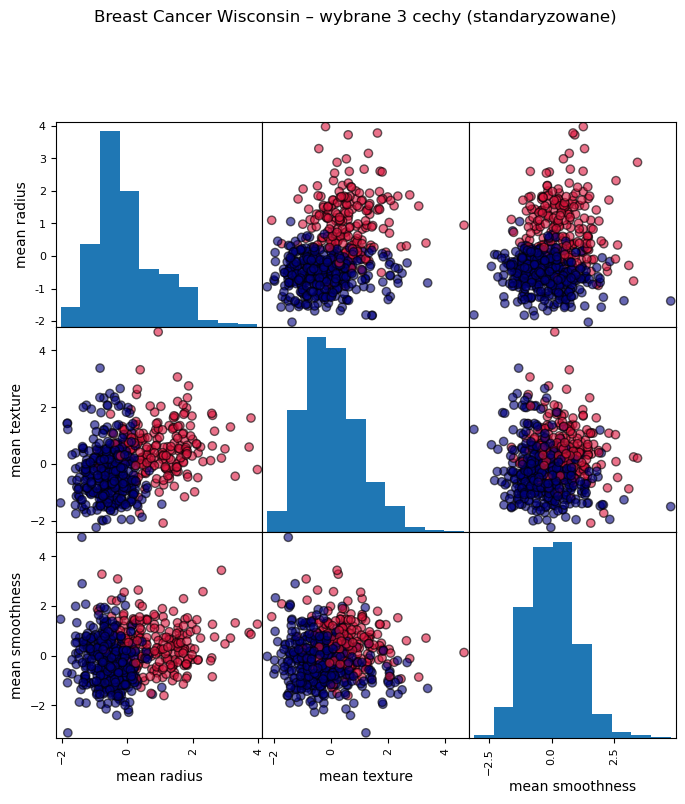

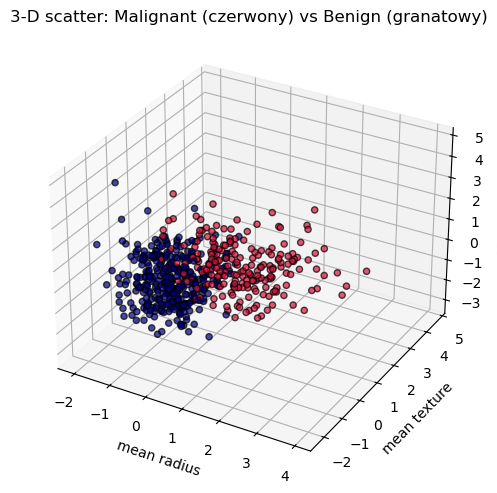

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

bc      = load_breast_cancer()
df      = pd.DataFrame(bc.data, columns=bc.feature_names)
df['y'] = bc.target

features = ['mean radius', 'mean texture', 'mean smoothness']

X_scaled = StandardScaler().fit_transform(df[features])
df_std   = pd.DataFrame(X_scaled, columns=features)
df_std['y'] = df['y']

pd.plotting.scatter_matrix(
    df_std[features],
    figsize=(8, 8),
    diagonal='hist',
    c=df_std['y'].map({0: 'crimson', 1: 'navy'}),
    marker='o',
    alpha=0.6,
    edgecolors='k'
)
plt.suptitle('Breast Cancer Wisconsin – wybrane 3 cechy (standaryzowane)', y=1.02)
plt.show()

fig  = plt.figure(figsize=(6, 5))
ax   = fig.add_subplot(111, projection='3d')
colors = df_std['y'].map({0: 'crimson', 1: 'navy'})

ax.scatter(
    df_std[features[0]],
    df_std[features[1]],
    df_std[features[2]],
    c=colors,
    alpha=0.7,
    edgecolors='k'
)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3-D scatter: Malignant (czerwony) vs Benign (granatowy)')
plt.tight_layout()
plt.show()

## Zadanie 2

Proszę dokonać czyszczenia danych, sprawdzić czy nie ma danych brakujących oraz dokonać skalowania danych

In [51]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

bc       = load_breast_cancer()
df_raw   = pd.DataFrame(bc.data, columns=bc.feature_names)
df_raw['y'] = bc.target

print('--- Informacje ogólne ---')
print(df_raw.info())

print('\n--- Statystyki opisowe ---')
display(df_raw.describe().T)

na_counts = df_raw.isna().sum()
if (na_counts > 0).any():
    print('\n⚠️  Wykryto braki danych w kolumnach:')
    display(na_counts[na_counts > 0])
    df_raw.fillna(df_raw.median(), inplace=True)
else:
    print('\n✅  Brak brakujących wartości.')

dup_n = df_raw.duplicated().sum()
print(f'\nDuplikaty wierszy: {dup_n}')
if dup_n:
    df_raw.drop_duplicates(inplace=True)
    print('→ duplikaty usunięte')

features = ['mean radius', 'mean texture', 'mean smoothness']

scaler      = StandardScaler()
X_scaled    = scaler.fit_transform(df_raw[features])
df_clean    = pd.DataFrame(X_scaled, columns=features, index=df_raw.index)
df_clean['y'] = df_raw['y']      # etykiety bez zmian

print('\n✅  Dane przygotowane – można przechodzić do trenowania KNN.')

--- Informacje ogólne ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744



✅  Brak brakujących wartości.

Duplikaty wierszy: 0

✅  Dane przygotowane – można przechodzić do trenowania KNN.


## Zadanie 3

Proszę zaimplementować algorytm KNN. Algorytm ma być w stanie dokonać klasyfikacji zarówno dla dwóch, jak i trzech cech. Parametr k ma być możliwy do podania na wejście algorytmu.

In [52]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k: int = 3):
        if k < 1 or not isinstance(k, int):
            raise ValueError("k musi być dodatnią liczbą całkowitą.")
        self.k = k
        self._X = None
        self._y = None

    # ------------------------- API -------------------------
    def fit(self, X: np.ndarray, y: np.ndarray):
        if len(X) != len(y):
            raise ValueError("X i y muszą mieć tę samą liczbę wierszy.")
        self._X = np.asarray(X, dtype=float)
        self._y = np.asarray(y)
        return self

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        if self._X is None:
            raise RuntimeError("Wywołaj fit() przed predict().")

        X_test = np.asarray(X_test, dtype=float)
        n_train = self._X.shape[0]
        if self.k > n_train:
            raise ValueError(f"k = {self.k} > liczba próbek treningowych ({n_train})")

        dists = np.linalg.norm(self._X[None, :, :] - X_test[:, None, :], axis=2)

        y_pred = np.empty(X_test.shape[0], dtype=self._y.dtype)
        for i, row in enumerate(dists):
            nn_idx = np.argpartition(row, self.k)[:self.k]   # indeksy k-NN
            nn_labels = self._y[nn_idx]
            y_pred[i] = Counter(nn_labels).most_common(1)[0][0]
        return y_pred

Wywołanie algorytmu KNN dla 2D i 3D

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features2 = ['mean radius', 'mean texture']
X2 = df_clean[features2].values
y  = df_clean['y'].values
X2_tr, X2_te, y_tr, y_te = train_test_split(X2, y, test_size=0.2,
                                            stratify=y, random_state=0)

knn2 = KNNClassifier(k=5)
knn2.fit(X2_tr, y_tr)
y_pred2 = knn2.predict(X2_te)
print(f'Accuracy (2 cechy, k=5): {accuracy_score(y_te, y_pred2):.3f}')

features3 = ['mean radius', 'mean texture', 'mean smoothness']
X3 = df_clean[features3].values
X3_tr, X3_te, y_tr, y_te = train_test_split(X3, y, test_size=0.2,
                                            stratify=y, random_state=0)

knn3 = KNNClassifier(k=7)
knn3.fit(X3_tr, y_tr)
y_pred3 = knn3.predict(X3_te)
print(f'Accuracy (3 cechy, k=7): {accuracy_score(y_te, y_pred3):.3f}')


Accuracy (2 cechy, k=5): 0.877
Accuracy (3 cechy, k=7): 0.930


## Zadanie 4

Proszę wytrenować model z użyciem zbiotu danych. Proszę pamiętać o odpowienim podziale na zbiór testowy i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów k - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanego parameteru k. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

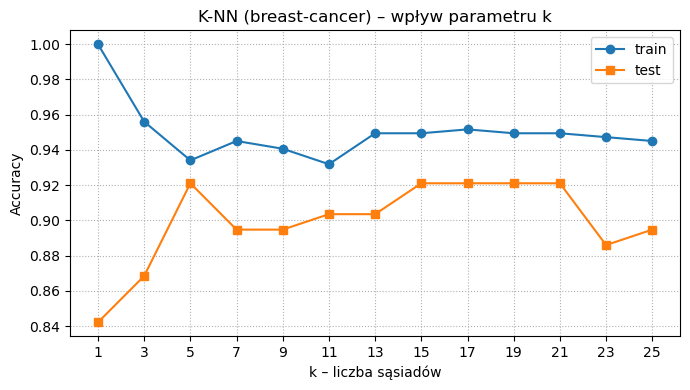

k,accuracy_train,accuracy_test
1,1.000000,0.842000
3,0.956000,0.868000
5,0.934000,0.921000
7,0.945000,0.895000
9,0.941000,0.895000
11,0.932000,0.904000
13,0.949000,0.904000
15,0.949000,0.921000
17,0.952000,0.921000
19,0.949000,0.921000


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['mean radius', 'mean texture', 'mean smoothness']
X = df_clean[features].values
y = df_clean['y'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

k_range = range(1, 26, 2)
train_acc, test_acc = [], []

for k in k_range:
    clf = KNNClassifier(k=k).fit(X_train, y_train)
    y_tr_pred = clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_tr_pred))
    y_te_pred = clf.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_te_pred))

plt.figure(figsize=(7, 4))
plt.plot(k_range, train_acc, marker='o', label='train')
plt.plot(k_range, test_acc,  marker='s', label='test')
plt.xticks(k_range)
plt.xlabel('k – liczba sąsiadów')
plt.ylabel('Accuracy')
plt.title('K-NN (breast-cancer) – wpływ parametru k')
plt.grid(ls=':')
plt.legend()
plt.tight_layout()
plt.show()

results = pd.DataFrame({
    'k': list(k_range),
    'accuracy_train': np.round(train_acc, 3),
    'accuracy_test':  np.round(test_acc, 3)
})
display(results.style.hide(axis='index'))

## Zadanie 5

Proszę porównać działanie zaimplementowanego algorytmu z implementacją z Scikit-learn. Proszę dokonać porównania w oparciu o szybkość oraz skuteczność działania. Jakie wnioski można wyciągnać?

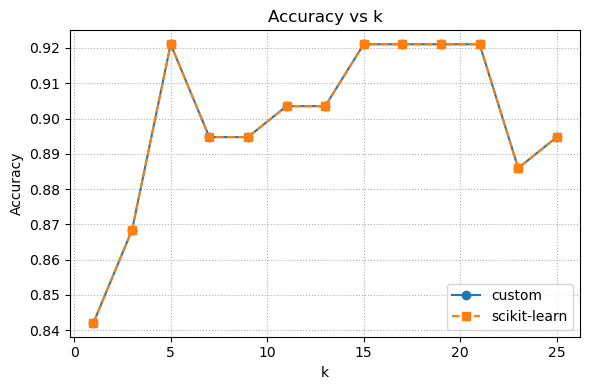

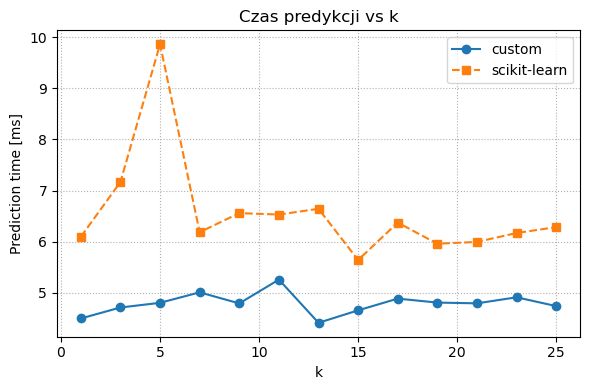

,k,acc_custom,acc_sklearn,pred_ms_custom,pred_ms_sklearn
0,1,0.842,0.842,4.500,6.097
1,3,0.868,0.868,4.715,7.168
2,5,0.921,0.921,4.807,9.861
3,7,0.895,0.895,5.011,6.187
4,9,0.895,0.895,4.795,6.560
5,11,0.904,0.904,5.260,6.532
6,13,0.904,0.904,4.416,6.645
7,15,0.921,0.921,4.659,5.644
8,17,0.921,0.921,4.888,6.375
9,19,0.921,0.921,4.811,5.961


In [55]:
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as SKKNN

y = df_clean['y'].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

k_range = range(1, 26, 2)

records = []
for k in k_range:
    # --- moje ---
    my_clf = KNNClassifier(k=k).fit(X_tr, y_tr)
    t0 = time.perf_counter()
    y_pred_my = my_clf.predict(X_te)
    t_pred_my = (time.perf_counter() - t0) * 1e3   # ms
    acc_my    = accuracy_score(y_te, y_pred_my)

    # --- scikit-learn ---
    sk_clf = SKKNN(n_neighbors=k).fit(X_tr, y_tr)
    t0 = time.perf_counter()
    y_pred_sk = sk_clf.predict(X_te)
    t_pred_sk = (time.perf_counter() - t0) * 1e3   # ms
    acc_sk    = accuracy_score(y_te, y_pred_sk)

    records.append({
        'k': k,
        'acc_custom':   acc_my,
        'acc_sklearn':  acc_sk,
        'pred_ms_custom': t_pred_my,
        'pred_ms_sklearn': t_pred_sk,
    })

results = pd.DataFrame(records)

plt.figure(figsize=(6,4))
plt.plot(results['k'], results['acc_custom'],  'o-', label='custom')
plt.plot(results['k'], results['acc_sklearn'], 's--', label='scikit-learn')
plt.xlabel('k'); plt.ylabel('Accuracy'); plt.title('Accuracy vs k'); plt.grid(ls=':')
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(results['k'], results['pred_ms_custom'],  'o-', label='custom')
plt.plot(results['k'], results['pred_ms_sklearn'], 's--', label='scikit-learn')
plt.xlabel('k'); plt.ylabel('Prediction time [ms]'); plt.title('Czas predykcji vs k')
plt.grid(ls=':'); plt.legend(); plt.tight_layout(); plt.show()

results.round(3)

Wnioski:
   -  obie implementacje dają identyczne predykcje
   - sklearn jest szybszy
   -  już k = 5 osiąga maksimum accuracy; dalsze zwiększanie nie przynosi korzyści, a wydłuża czas predykcji. Dobra zasada: wybrać najmniejsze k z „płaskiego” plateau skuteczności.

## Zadanie 6

Proszę wyrysować krzywą ROC oraz obliczyć miarę AUC dla wytrenowanych modeli.

AUC – custom KNN      : 0.965
AUC – scikit-learn KNN: 0.965


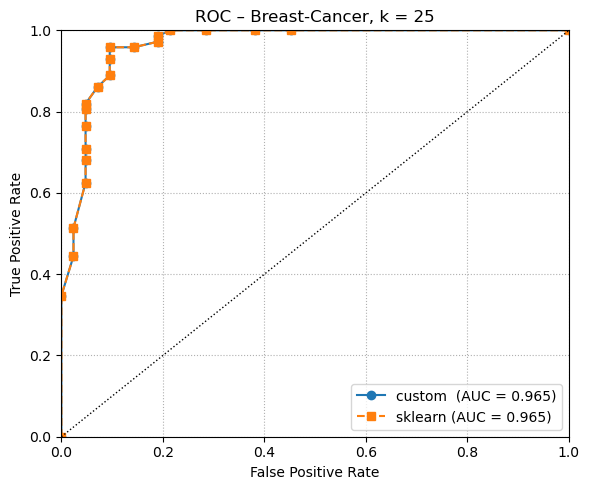

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def knn_custom_predict_proba(model, X):
    dists = np.linalg.norm(model._X[None, :, :] - X[:, None, :], axis=2)
    probs = np.empty(X.shape[0], dtype=float)
    for i, row in enumerate(dists):
        nn_idx   = np.argpartition(row, model.k)[: model.k]
        nn_lbl   = model._y[nn_idx]
        probs[i] = nn_lbl.mean()
    return probs

y_score_custom = knn_custom_predict_proba(my_clf, X_te)
y_score_sklearn = sk_clf.predict_proba(X_te)[:, 1]

fpr_c, tpr_c, _ = roc_curve(y_te, y_score_custom)
fpr_s, tpr_s, _ = roc_curve(y_te, y_score_sklearn)

auc_c = roc_auc_score(y_te, y_score_custom)
auc_s = roc_auc_score(y_te, y_score_sklearn)

print(f"AUC – custom KNN      : {auc_c:.3f}")
print(f"AUC – scikit-learn KNN: {auc_s:.3f}")

plt.figure(figsize=(6,5))
plt.plot(fpr_c, tpr_c, 'o-',  label=f'custom  (AUC = {auc_c:.3f})')
plt.plot(fpr_s, tpr_s, 's--', label=f'sklearn (AUC = {auc_s:.3f})')
plt.plot([0,1], [0,1], 'k:', lw=1)
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC – Breast-Cancer, k = {}'.format(my_clf.k))
plt.legend()
plt.grid(ls=':')
plt.tight_layout()
plt.show()